In [2]:
# Import the necessary library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn import linear_model
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [ ]:
# Import the dataset
crabAge = pd.read_csv('CrabAgePrediction.csv')
crabAge.head()

In [4]:
# Check each column data type and missing value
crabAge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3893 entries, 0 to 3892
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             3893 non-null   object 
 1   Length          3893 non-null   float64
 2   Diameter        3893 non-null   float64
 3   Height          3893 non-null   float64
 4   Weight          3893 non-null   float64
 5   Shucked Weight  3893 non-null   float64
 6   Viscera Weight  3893 non-null   float64
 7   Shell Weight    3893 non-null   float64
 8   Age             3893 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 273.9+ KB


In [5]:
# Check the duplicated data
duplicated_data = crabAge.duplicated().sum()
print(f'Duplicated data : {duplicated_data}')

Duplicated data : 0


# Exploratory Data Analysis

## Percentage of Crab Gender

<AxesSubplot:ylabel='Sex'>

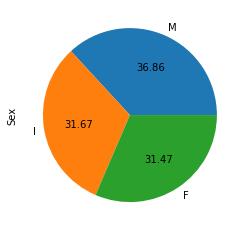

In [6]:
crabAge["Sex"].value_counts().plot(kind = "pie" , autopct = "%.2f" )

Based on the pie chart above, the percentage of male crab in the data is over 36.86%, 31.67% for female crab and other is indeterminate 

In [7]:
# separate labels in the sex column
crabAge = pd.concat([pd.get_dummies(crabAge["Sex"]) ,crabAge.drop("Sex" , axis = 1)] ,axis = 1 ,join = "inner")

crabAge

,F,I,M,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,1,0,0,1.4375,1.1750,0.4125,24.635715,12.332033,5.584852,6.747181,9
1,0,0,1,0.8875,0.6500,0.2125,5.400580,2.296310,1.374951,1.559222,6
2,0,1,0,1.0375,0.7750,0.2500,7.952035,3.231843,1.601747,2.764076,6
3,1,0,0,1.1750,0.8875,0.2500,13.480187,4.748541,2.282135,5.244657,10
4,0,1,0,0.8875,0.6625,0.2125,6.903103,3.458639,1.488349,1.700970,6
...,...,...,...,...,...,...,...,...,...,...,...
3888,1,0,0,1.4625,1.1375,0.3250,24.819987,11.651644,5.854172,6.378637,8
3889,1,0,0,1.5500,1.2125,0.4375,34.458817,15.450477,7.172423,9.780577,10
3890,0,1,0,0.6250,0.4625,0.1625,2.012815,0.765436,0.524466,0.637864,5
3891,0,1,0,1.0625,0.7750,0.2625,10.347568,4.507570,2.338834,2.976698,6


## Correlation Matrix to find relationship between the variables

<AxesSubplot:>

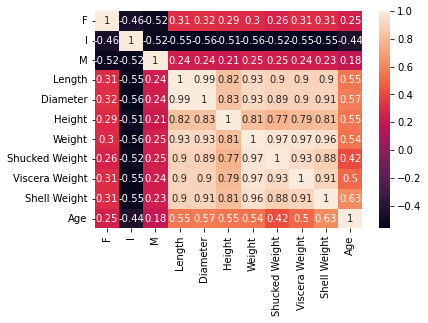

In [8]:
sns.heatmap(crabAge.corr(),annot=True)

In [9]:
crabAge.describe()

,F,I,M,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
count,3893.000000,3893.000000,3893.00000,3893.000000,3893.000000,3893.000000,3893.000000,3893.000000,3893.000000,3893.000000,3893.000000
mean,0.314667,0.316722,0.36861,1.311306,1.020893,0.349374,23.567275,10.207342,5.136546,6.795844,9.954791
std,0.464443,0.465258,0.48249,0.300431,0.248233,0.104976,13.891201,6.275275,3.104133,3.943392,3.220967
min,0.000000,0.000000,0.00000,0.187500,0.137500,0.000000,0.056699,0.028349,0.014175,0.042524,1.000000
25%,0.000000,0.000000,0.00000,1.125000,0.875000,0.287500,12.672227,5.343881,2.664853,3.713785,8.000000
50%,0.000000,0.000000,0.00000,1.362500,1.062500,0.362500,22.792998,9.539607,4.861939,6.662133,10.000000
75%,1.000000,1.000000,1.00000,1.537500,1.200000,0.412500,32.786197,14.273973,7.200773,9.355335,11.000000
max,1.000000,1.000000,1.00000,2.037500,1.625000,2.825000,80.101512,42.184056,21.545620,28.491248,29.000000


<AxesSubplot:xlabel='Length', ylabel='Count'>

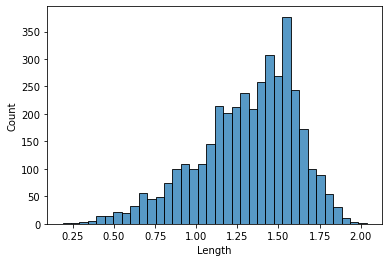

In [10]:
sns.histplot(crabAge['Length'])

<AxesSubplot:xlabel='Diameter', ylabel='Count'>

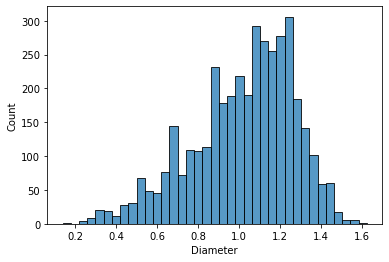

In [11]:
sns.histplot(crabAge['Diameter'])

<AxesSubplot:xlabel='Height', ylabel='Count'>

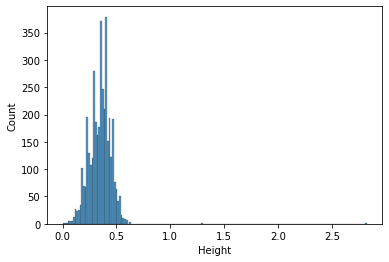

In [12]:
sns.histplot(crabAge['Height'])

<AxesSubplot:xlabel='Weight', ylabel='Count'>

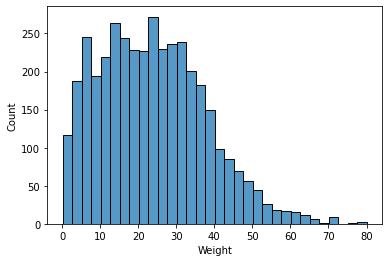

In [13]:
sns.histplot(crabAge['Weight'])

<AxesSubplot:xlabel='Shucked Weight', ylabel='Count'>

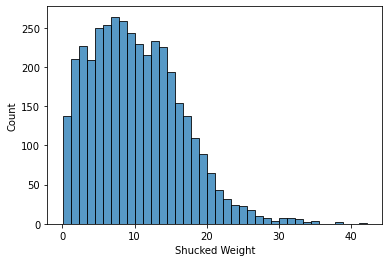

In [14]:
sns.histplot(crabAge['Shucked Weight'])

<AxesSubplot:xlabel='Viscera Weight', ylabel='Count'>

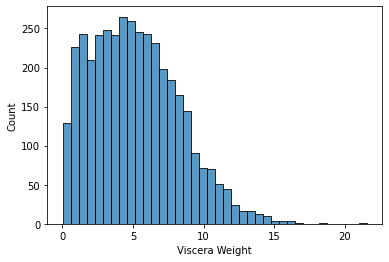

In [15]:
sns.histplot(crabAge['Viscera Weight'])

<AxesSubplot:xlabel='Shell Weight', ylabel='Count'>

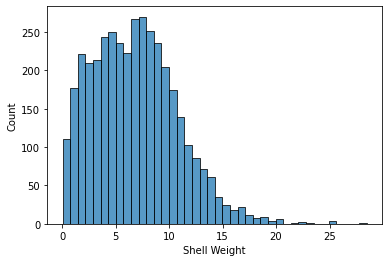

In [16]:
sns.histplot(crabAge['Shell Weight'])

In [17]:
X = crabAge[['F','M','Length','Diameter','Height','Weight','Shucked Weight','Shell Weight','Viscera Weight','Shucked Weight']].values
y = crabAge['Age'].values

- Use the function train_test_split to split the data X and Y into training and test data.
- Set the parameter test_size to 0.2 and random_state to 2.
- The training data and test data should be assigned to the following labels.

In [20]:
# Split the data to Train Set and Test Set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

# Shape of Train set and Test set
print('Train set:', X_train.shape, y_train.shape)
print('Test set:', X_test.shape, y_test.shape)

Train set: (3114, 10) (3114,)
Test set: (779, 10) (779,)


In [21]:
linear_regression = linear_model.LinearRegression()
linear_regression.fit(X_train,y_train)
y_pred_linear = linear_regression.predict(X_test)

# Support Vector Regression

In [23]:
svr = SVR(kernel="linear", C=100, gamma="auto")
svr.fit(X_train,y_train)
y_pred_svr = svr.predict(X_test)

# Model Evaluation

# Linear Regression

In [24]:
print(f'MAE : {mean_absolute_error(y_test, y_pred_linear)}')
print(f'MSE : {mean_squared_error(y_test, y_pred_linear)}')
print(f'r2score : {r2_score(y_test,y_pred_linear)}')

MAE : 1.501725425618595
MSE : 4.45845035858199
r2score : 0.5284752284622656


**Distribution Plot** 

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Age')

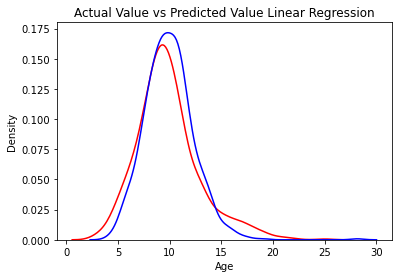

In [30]:
ax = sns.distplot(y_test, color='r',label='Actual Value',hist=False)
sns.distplot(y_pred_linear, color='b',label='Predicted Value',hist=False,ax=ax)
plt.title('Actual Value vs Predicted Value Linear Regression')
plt.xlabel('Age')

# Support Vector Regression

In [29]:
print(f'MAE : {mean_absolute_error(y_test, y_pred_svr)}')
print(f'MSE : {mean_squared_error(y_test, y_pred_svr)}')
print(f'r2score : {r2_score(y_test,y_pred_svr)}')

MAE : 1.4575595605450025
MSE : 4.39405467582228
r2score : 0.5352857023173443


**Distribution Plot**

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Age')

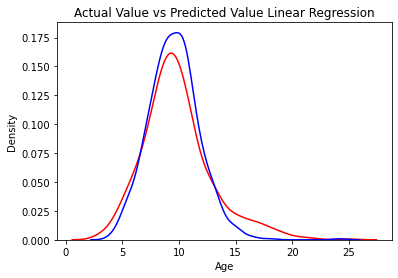

In [31]:
ax = sns.distplot(y_test, color='r',label='Actual Value',hist=False)
sns.distplot(y_pred_svr, color='b',label='Predicted Value',hist=False,ax=ax)
plt.title('Actual Value vs Predicted Value Linear Regression')
plt.xlabel('Age')